<a href="https://colab.research.google.com/github/danielamejiacastro/MLDS--Course/blob/main/Fase_2_Entendimiento_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1vU_Lg5LD6Dn521znF_9E6OsJgwptOT9E" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento de los Datos**
---

Este notebook es una plantilla que le puede servir como guía para el segundo entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. John Robert Gomez Pachón
2. Yojhan Leandro Roldan Robles
3. Daniela Mejia Castro

## **1. Carga de datos**
---
Proporcione únicamente el código de Python necesario para descargar el conjunto de datos que será utilizado en el proyecto. Si es necesario, realice operaciones de adquisición e integración del conjunto de datos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

#from google.colab import files
#files=files.upload()

!ls

Data
Fase_2_Entendimiento_de_los_datos.ipynb
Proyecto:Fase_1_Entendimiento_del_negocio.ipynb
README.md


In [ ]:
#Lectura de los datos en Github
#df=pd.read_csv('Data/heart_failure_clinical_records_dataset.csv')
#Lectura de los datos desde repositorio local
df=pd.read_csv('Data/heart_failure_clinical_records_dataset.csv')

###**2.1 Exploración de los datos**

## **2. Análisis Exploratorio de los Datos**
---

En esta fase, nos dedicamos a explorar y analizar detalladamente nuestro conjunto de datos con el objetivo de resumir sus características fundamentales. Nuestra meta es descubrir patrones, identificar anomalías y comprender comportamientos que puedan proporcionar insights valiosos. Este análisis exploratorio nos permite establecer, evaluar y verificar hipótesis, proporcionando una base sólida para la interpretación y toma de decisiones fundamentadas en los datos.

In [ ]:
#Primer acercamiento a los datos
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
158,85.0,1,910,0,50,0,235000.0,1.3,134,1,0,121,0
179,55.0,0,835,0,40,0,279000.0,0.7,140,1,1,147,0
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0
218,68.0,1,1021,1,35,0,271000.0,1.1,134,1,0,197,0
65,60.0,0,68,0,20,0,119000.0,2.9,127,1,1,64,1


In [ ]:
#Dimensiones
print(f'El set de datos contiene {df.shape[0]} registros con {df.shape[1]} variables.\nEl conjunto contiene un total de {df.size} datos.\n')
tamaño_archivo=os.path.getsize('heart_failure_clinical_records_dataset.csv')/ (1024 ** 2)
print(f'El archivo cargado pesa un total de {tamaño_archivo} MB.\nEl espacio en memoria del dataframe es de {df.memory_usage().sum()/(1024**2)} MB')

El set de datos contiene 299 registros con 13 variables.
El conjunto contiene un total de 3887 datos.

El archivo cargado pesa un total de 0.011672019958496094 MB.
El espacio en memoria del dataframe es de 0.02977752685546875 MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


###**2.2 Tipos de variables**

En el conjunto de datos que vamos estamos analizando, se incluyen diversas variables que caracterizan a 299 pacientes que han experimentado un fallo cardiaco. Estas variables abarcan tanto tipos discretos como continuos, y la intención es comprender el comportamiento de los pacientes afectados. El objetivo principal es estudiar la dinámica de los datos con el fin de prever posibles patrones que indiquen la probabilidad de reincidencia en casos de fallo cardiaco.

In [ ]:
def identificar_dtypes(df):
  '''
  Esta función detecta las variables consideradas como categoricas y cuantitativas en este set especifico
  La función retorna dos listas, cada una agrupando las variables del dataframe
  La función solo identifica las variables categoricas para este tipo de dataset en el cual solo tienen dos valores: [0,1]
  '''
  variables_categoricas=[]
  variables_cuantitativas=[]
  for col in df.columns:
    if set(df[col].unique())==set([0,1]):
      variables_categoricas.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
      variables_cuantitativas.append(col)
    else:
      print(f'La variable {col} no ha sido identificada')
  return variables_categoricas,variables_cuantitativas

In [ ]:
variables_categoricas,variables_cuantitativas=identificar_dtypes(df)
print(f'Variables categoricas: {variables_categoricas}.\n\nVariables cuantitativas: {variables_cuantitativas}')

Variables categoricas: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'].

Variables cuantitativas: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


#### **Tabla 1: Características del conjunto de datos sobre pacientes con insuficiencia cardíaca**

La tabla presenta las distintas características del conjunto de datos que se enfoca en pacientes que han experimentado insuficiencia cardíaca. Dichas características incluyen información demográfica como la edad y el sexo, así como medidas médicas como el peso, la altura, la presión arterial, niveles de hemoglobina, entre otros. Las variables se clasifican en numéricas y binarias:

| Característica | Descripción | Tipo |
|---|---|---|
| Edad | Edad del paciente en años | Numérica |
| Sexo | Sexo del paciente (hombre/mujer) | Binaria |
| Peso | Peso del paciente en kilogramos | Numérica |
| Altura | Altura del paciente en metros | Numérica |
| Hemoglobina | Nivel de hemoglobina en la sangre (g/dL) | Numérica |
| Presión arterial | Presión arterial sistólica/diastólica (mmHg) | Numérica |
| Diabetes | ¿Tiene diabetes el paciente? (sí/no) | Binaria |
| Tabaquismo | ¿Fuma el paciente? (sí/no) | Binaria |
| Anemia | ¿Tiene anemia el paciente? (sí/no) | Binaria |
| CPK | Nivel de la enzima CPK en la sangre (U/L) | Numérica |
| EF | Eficiencia cardíaca (%) | Numérica |
| Creatinina sérica | Nivel de creatinina en la sangre (mg/dL) | Numérica |
| Sodio sérico | Nivel de sodio en la sangre (mEq/L) | Numérica |
| Evento de muerte | ¿El paciente murió durante el seguimiento? (sí/no) | Binaria |


### **2.3 Resumen General**
---

- ¿Cuántos registros contiene el *dataset*?

Nuestro conjunto de datos alberga un total de 299 registros, distribuidos entre 105 correspondientes a mujeres y 194 a hombres, abarcando edades desde los 40 hasta los 95 años.

- ¿En qué formato están guardados los datos?

Los datos se encuentran almacenados en formato (.csv), que representa Valores Separados por Comas en inglés. Estos archivos, de aparente simplicidad pero con gran potencial, son una herramienta fundamental en el ámbito de la informática y la gestión de datos. Este formato destaca por su universalidad, simplicidad, portabilidad, facilidad de intercambio y eficiencia en el almacenamiento, entre otras ventajas.

- ¿Qué tamaño en MB tiene el conjunto de datos?

El tamaño del conjunto de datos es de 11.9 KB (12,239 bytes), equivalente a 0.012239 MB.

**Responder aqui**

## **3. Análisis estadístico descriptivo**
---

Describa el conjunto de datos por medio de estadística descriptiva, aportando interpretaciones precisas que ayuden a entender los datos.

###**3.1 Medidas de posición (tendencia central y cuantiles)**

In [ ]:
#Medidas de tendencia central: Mediana
df[variables_cuantitativas].median()

age                             60.0
creatinine_phosphokinase       250.0
ejection_fraction               38.0
platelets                   262000.0
serum_creatinine                 1.1
serum_sodium                   137.0
time                           115.0
dtype: float64

In [ ]:
#Medidas de tendencia central: Moda
df.mode()
#Encontramos que para la variable time tenemos 2 modas: 187 y 250

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,60.0,0.0,582.0,0.0,35.0,0.0,263358.03,1.0,136.0,1.0,0.0,187,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,NaN


In [ ]:
#Medidas de tendencia central: Media, desviación estandar
#Medidas de posición: Cuantiles
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


####**3.1.1 Graficos de caja o boxplots**

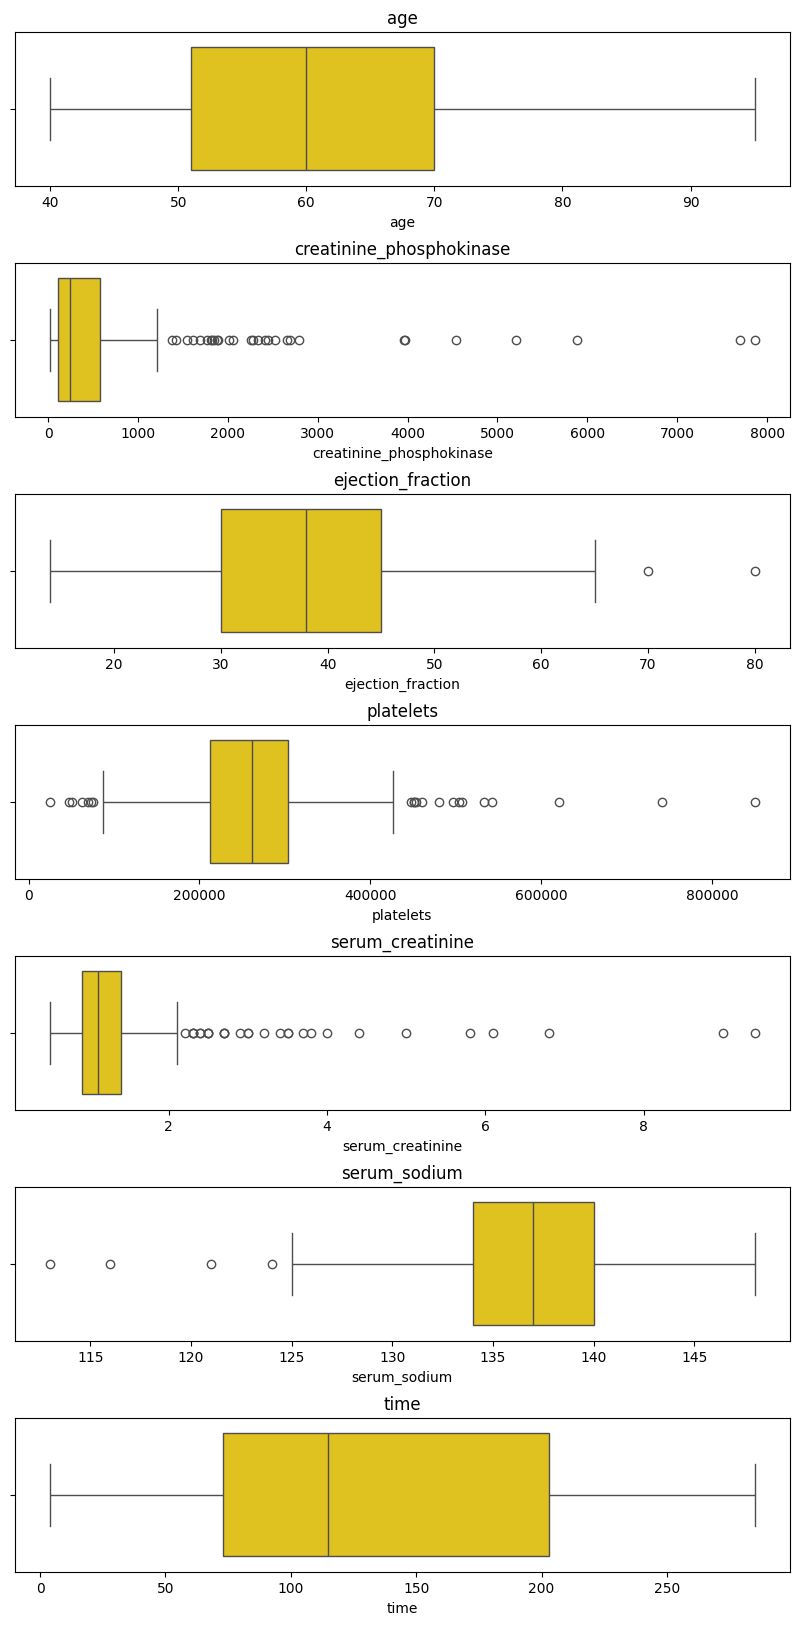

In [ ]:
#Boxplots para identificar outliers
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(variables_cuantitativas):
    sns.boxplot(x=col, data=df, ax=ax[i],color='gold')
    ax[i].set_title(col)

**Variable: Edad (age)**

En este diagrama de bigotes, observamos que la mediana de la edad está alrededor de 60 años, el rango intercuartílico (IQR) abarca desde aproximadamente 51 a 70 años, y no hay valores atípicos evidentes.

**Variable: Nivel de Creatinina Fosfoquinasa (creatinine_phosphokinase)**

En este caso, vemos que el nivel de creatinina fosfoquinasa tiende a tener valores más bajos en su mayor parte, pero hay algunos puntos que podrían considerarse valores atípicos, ya que se encuentran fuera de los bigotes.

**Variable: Plaquetas (platelets)**

En el diagrama de bigotes de la variable "Plaquetas", se observa que la mediana está alrededor de 262,000 unidades. El rango intercuartílico (IQR) sugiere que la mayoría de los datos se concentran entre 212,500 y 303,500 unidades, con algunos valores atípicos por encima de este rango superior.

**Variable: Nivel de Creatinina en Suero (serum_creatinine)**

El diagrama de bigotes para la creatinina en suero muestra que la mediana está cerca de 1.1 mg/dL, con un IQR que se extiende desde aproximadamente 0.9 hasta 1.4 mg/dL. Se identifican algunos valores atípicos por encima de este rango superior.

**Variable: Nivel de Sodio en Suero (serum_sodium)**

El diagrama de bigotes para el sodio en suero indica que la mediana se encuentra alrededor de 137 mEq/L, con un IQR que va desde aproximadamente 134 hasta 140 mEq/L. No hay valores atípicos evidentes en este caso.

**Variable: Período de Seguimiento (time)**

Para la variable "Período de Seguimiento", el diagrama de bigotes muestra una mediana cercana a 115 días y un IQR que se extiende desde aproximadamente 73 hasta 203 días. No se identifican valores atípicos en este rango.

**Variable: Evento de Fallecimiento (DEATH_EVENT)**

En el diagrama de bigotes de la variable "Evento de Fallecimiento", se observa que la mediana es 0 (sin evento de fallecimiento) y que la mayoría de los datos se concentran en 0, con algunos valores atípicos representando eventos de fallecimiento (1).

###**3.2 Medidas de forma**

In [ ]:
#Medidas de forma: Kurtosis
df[variables_cuantitativas].kurt()

age                         -0.184871
creatinine_phosphokinase    25.149046
ejection_fraction            0.041409
platelets                    6.209255
serum_creatinine            25.828239
serum_sodium                 4.119712
time                        -1.212048
dtype: float64

Los resultados de las medidas de forma, conocidas como kurtosis, ofrecen insights sobre la configuración de las distribuciones de las variables. A continuación, presentamos un análisis preliminar de la kurtosis para cada una de nuestras variables:

**Kurtosis Variable Edad (age):** La kurtosis es -0.18, lo que sugiere una distribución relativamente cercana a una distribución normal. La cola de la distribución de edades no es muy pesada.

**Kurtosis Variable Creatinina Fosfoquinasa (creatinine_phosphokinase):** La kurtosis es 25.15, indicando una distribución con colas pesadas. Esto podría sugerir la presencia de valores extremadamente altos en la variable.

**Kurtosis VariableEficiencia de Eyección (ejection_fraction):** La kurtosis es 0.04, lo que sugiere una distribución bastante normal. La variable no tiene colas pesadas.

**Kurtosis Variable Plaquetas (platelets):** La kurtosis es 6.21, indicando colas pesadas en la distribución de plaquetas. Esto puede sugerir la presencia de valores atípicos extremadamente altos.

**Kurtosis Variable Creatinina en Suero (serum_creatinine):** La kurtosis es 25.83, lo que sugiere colas pesadas en la distribución de la creatinina en suero. Esto podría indicar la presencia de valores extremadamente altos.

**Kurtosis Variable Sodio en Suero (serum_sodium):** La kurtosis es 4.12, indicando colas pesadas en la distribución de sodio en suero. Puede haber valores extremadamente altos o bajos en la variable.

**Kurtosis Variable Período de Seguimiento (time):** La kurtosis es -1.21, sugiriendo una distribución relativamente plana o con colas ligeras. La variable podría tener menos presencia de valores extremadamente altos o bajos.

In [ ]:
#Medidas de forma: Asimetria
df[variables_cuantitativas].skew()

age                         0.423062
creatinine_phosphokinase    4.463110
ejection_fraction           0.555383
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
time                        0.127803
dtype: float64

**Asimetria Variable Edad (age)**: La asimetría es positiva (0.42), sugiriendo una cola derecha en la distribución de edades. Esto indica que hay más datos en el lado izquierdo de la media y algunos valores más altos que la media.

**Asimetria Variable Creatinina Fosfoquinasa (creatinine_phosphokinase)**: La asimetría es positiva (4.46), indicando una cola derecha pronunciada. Esto sugiere que la mayoría de los valores están en el lado izquierdo de la media, pero hay algunos valores extremadamente altos.

**Asimetria Variable Eficiencia de Eyección (ejection_fraction)**: La asimetría es positiva (0.56), indicando una cola derecha en la distribución de la eficiencia de eyección. Puede haber algunos valores más altos que la media.

**Asimetria Variable Plaquetas (platelets)**: La asimetría es positiva (1.46), sugiriendo una cola derecha. La mayoría de los datos se encuentran en el lado izquierdo de la media, pero hay algunos valores extremadamente altos.

**Asimetria Variable Creatinina en Suero (serum_creatinine)**: La asimetría es positiva (4.46), indicando una cola derecha pronunciada en la distribución de la creatinina en suero. La mayoría de los valores se concentran en el lado izquierdo de la media, pero hay algunos valores extremadamente altos.

**Asimetria Variable Sodio en Suero (serum_sodium)**: La asimetría es negativa (-1.05), indicando una cola izquierda en la distribución del sodio en suero. Puede haber algunos valores más bajos que la media.

**Asimetria Variable Período de Seguimiento (time)**: La asimetría es ligeramente positiva (0.13), sugiriendo una cola derecha en la distribución del período de seguimiento. Puede haber algunos valores más altos que la media.

####**3.1.1 Histogramas**
---
Edad (age):
Dado que la kurtosis es cercana a cero y la asimetría es moderadamente positiva, el histograma de la variable "Edad" muestra una forma simétrica, similar a una distribución normal, con la mayoría de las edades centradas en torno a la media.

Creatinina Fosfoquinasa (creatinine_phosphokinase):
Con una kurtosis alta y una asimetría positiva pronunciada, el histograma presenta una concentración significativa de valores hacia la izquierda y una cola derecha extendida, indicando la presencia de valores extremadamente altos.

Eficiencia de Eyección (ejection_fraction):
Dado que la kurtosis es cercana a cero y la asimetría es moderadamente positiva, el histograma presenta una forma simétrica, similar a una distribución normal, con algunos valores más altos que la media.

Plaquetas (platelets):
Con una kurtosis alta y una asimetría positiva pronunciada, el histograma muestra una concentración de valores hacia la izquierda y una cola derecha pronunciada, señalando la presencia de valores atípicos extremadamente altos.

Creatinina en Suero (serum_creatinine):
Similar a la creatinina fosfoquinasa, con alta kurtosis y asimetría positiva pronunciada, el histograma presenta una concentración de valores hacia la izquierda y una cola derecha extendida, indicando la presencia de valores extremadamente altos.

Sodio en Suero (serum_sodium):
Con una kurtosis moderadamente alta y asimetría negativa, el histograma muestra una concentración de valores hacia la derecha y una cola izquierda, indicando la posibilidad de valores extremadamente bajos.

Período de Seguimiento (time):
Dado que la kurtosis es negativa y la asimetría es moderadamente positiva, el histograma presenta una concentración de valores hacia la izquierda y una cola derecha, sugiriendo que la mayoría de los periodos de seguimiento están en el lado más corto.

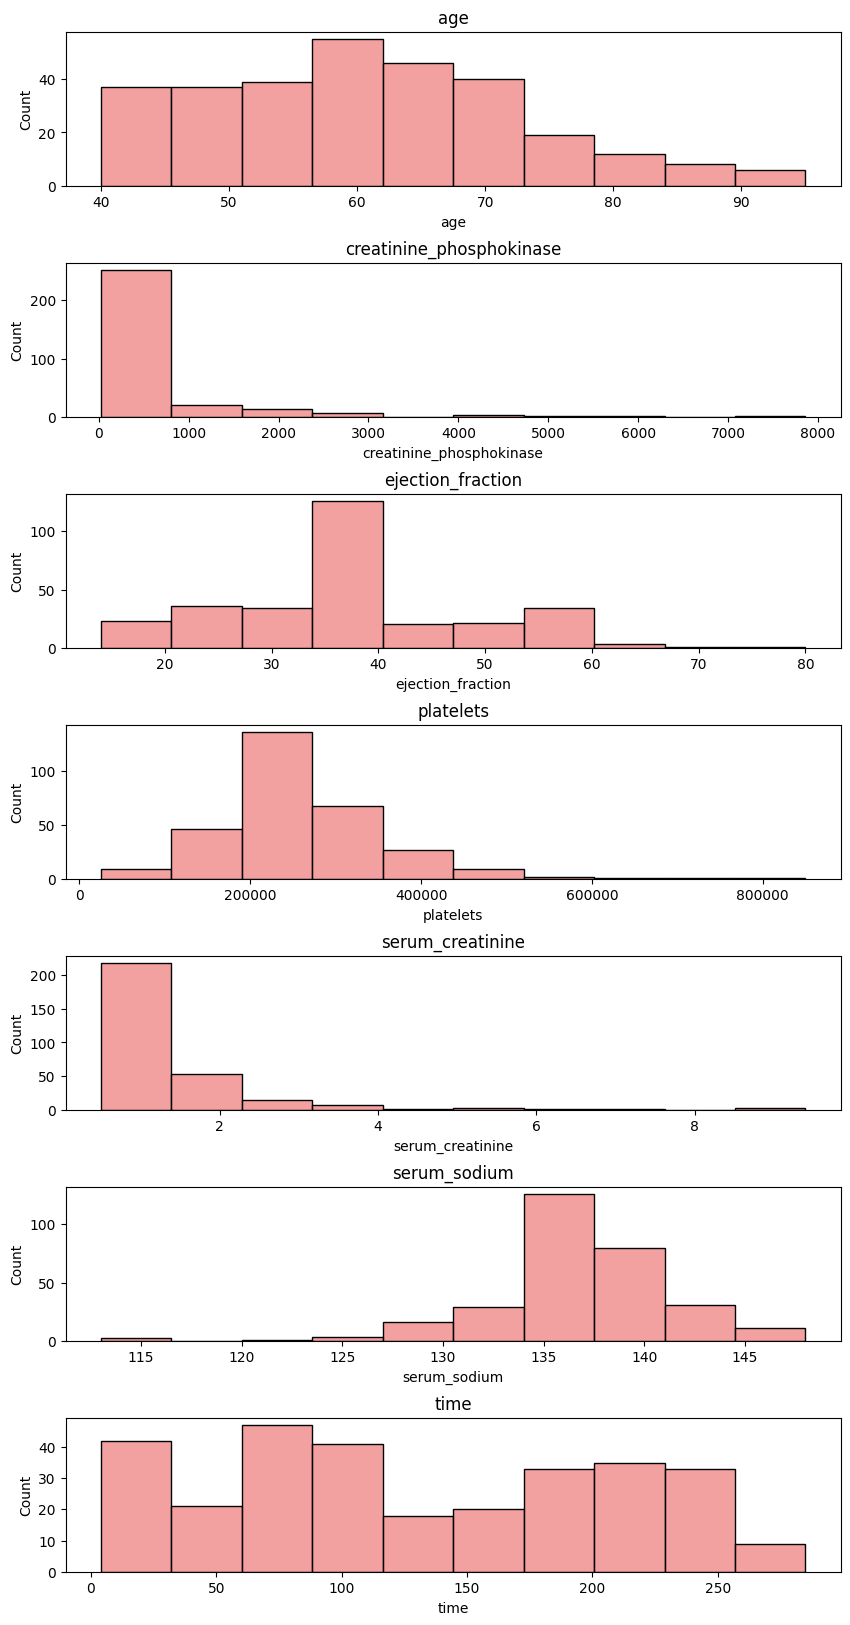

In [ ]:
#Histogramas
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=0.5)

for i, columna in enumerate(variables_cuantitativas):
    sns.histplot(df[columna], bins=10, kde=False, ax=ax[i],color='lightcoral')
    ax[i].set_title(columna)

### **3.1.2 Diagramas de barras**
---
Para visualizar las variables binarias o categoricas

<ipython-input-19-01479c242acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,ax=ax[i],palette='flare')
<ipython-input-19-01479c242acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,ax=ax[i],palette='flare')
<ipython-input-19-01479c242acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,ax=ax[i],palette='flare')
<ipython-input-19-01479c242acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

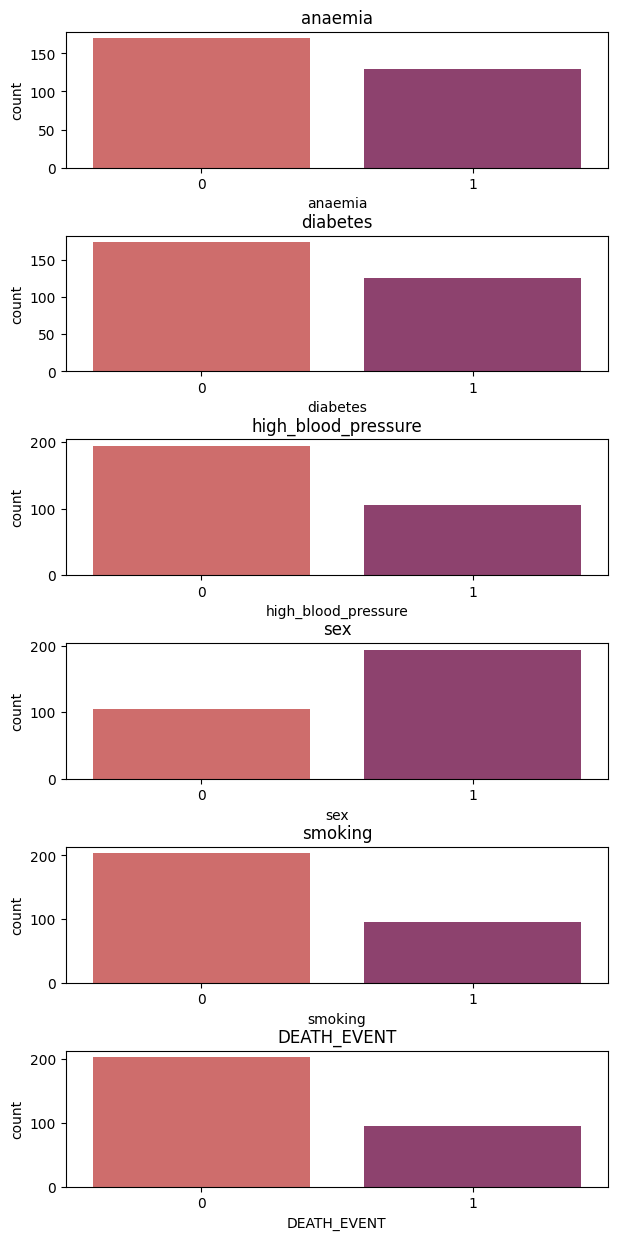

In [ ]:
fig,ax=plt.subplots(nrows=len(variables_categoricas),ncols=1,figsize=(7,15))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(variables_categoricas):
  sns.countplot(x=col,data=df,ax=ax[i],palette='flare')
  ax[i].set_title(col)

### **3.3 Medidas de dispersión**

In [ ]:
#Media, valor minimo, valor maximo y desiación estandar
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
#Varianza
df[variables_cuantitativas].var()

age                         1.414865e+02
creatinine_phosphokinase    9.414586e+05
ejection_fraction           1.400635e+02
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
time                        6.023965e+03
dtype: float64

In [ ]:
#Rango
df[variables_cuantitativas].max()-df[variables_cuantitativas].min()

age                             55.0
creatinine_phosphokinase      7838.0
ejection_fraction               66.0
platelets                   824900.0
serum_creatinine                 8.9
serum_sodium                    35.0
time                           281.0
dtype: float64

In [ ]:
#Media de las variables agrupadas por sexo
df.groupby('sex').mean()[variables_cuantitativas]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
sex,,,,,,,
0,59.777781,476.780952,40.466667,279964.021619,1.384095,136.790476,131.904762
1,61.405500,638.701031,36.793814,254370.249897,1.399175,136.536082,129.371134


### **3.4 Medidas multivariadas**

In [ ]:
#correlación
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [ ]:
#covarianza
df[variables_cuantitativas].cov()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,141.486483,-9.415915e+02,8.460237,-6.090712e+04,1.958845,-2.412544,-206.861351
creatinine_phosphokinase,-941.591531,9.414586e+05,-506.174452,2.321533e+06,-16.470382,254.956443,-703.803618
ejection_fraction,8.460237,-5.061745e+02,140.063455,8.354524e+04,-0.138379,9.185787,38.330464
platelets,-60907.118586,2.321533e+06,83545.241001,9.565669e+09,-4168.399498,26810.436905,79811.066099
serum_creatinine,1.958845,-1.647038e+01,-0.138379,-4.168399e+03,1.070211,-0.863173,-11.988935
serum_sodium,-2.412544,2.549564e+02,9.185787,2.681044e+04,-0.863173,19.469956,30.014152
time,-206.861351,-7.038036e+02,38.330464,7.981107e+04,-11.988935,30.014152,6023.965276


<Axes: >

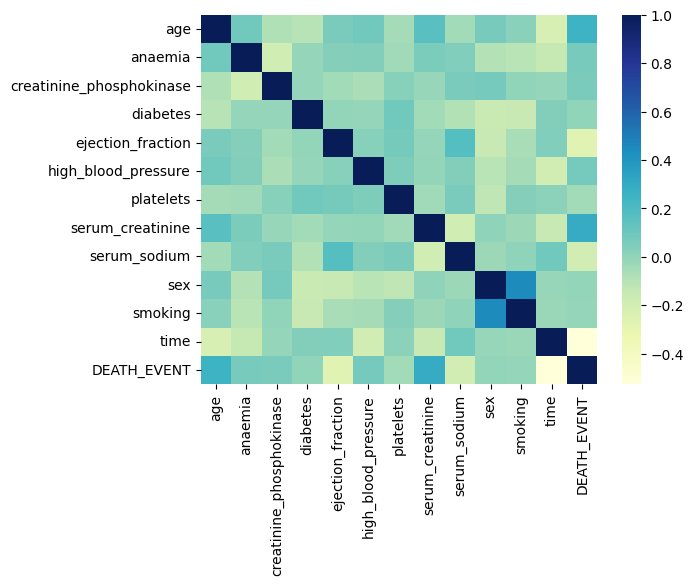

In [ ]:
sns.heatmap(df.corr(),
            cmap='YlGnBu')

#### **3.4.1 Crosstabs para variables categoricas frente a DEATH_EVENT**

In [ ]:
#Frente al sexo
pd.crosstab(df['DEATH_EVENT'],df['sex'],
            margins=True)

sex,0,1,All
DEATH_EVENT,,,
0,71,132,203
1,34,62,96
All,105,194,299


In [ ]:
#Frente a la anemia
pd.crosstab(df['DEATH_EVENT'],df['anaemia'],
            margins=True)

anaemia,0,1,All
DEATH_EVENT,,,
0,120,83,203
1,50,46,96
All,170,129,299


In [ ]:
#Frente a la diabetes
pd.crosstab(df['DEATH_EVENT'],df['diabetes'],
            margins=True)

diabetes,0,1,All
DEATH_EVENT,,,
0,118,85,203
1,56,40,96
All,174,125,299


In [ ]:
#Frente a fumar
pd.crosstab(df['DEATH_EVENT'],df['smoking'],
            margins=True)

smoking,0,1,All
DEATH_EVENT,,,
0,137,66,203
1,66,30,96
All,203,96,299


In [ ]:
#Frente a la alta presión sanguinea
pd.crosstab(df['DEATH_EVENT'],df['high_blood_pressure'],
            margins=True)

high_blood_pressure,0,1,All
DEATH_EVENT,,,
0,137,66,203
1,57,39,96
All,194,105,299


### **4. Resumen de la Calidad de los datos**
---

- ¿Se detecta la ausencia de datos, la presencia de datos erróneos o la existencia de datos de baja calidad en el conjunto?
- ¿Se identifican registros con datos ilegibles o con dificultades de codificación durante la revisión del conjunto de datos?
- ¿Se observa una diversidad de formatos en el conjunto de datos que pueda dificultar su consistencia o comprensión?
- ¿Se identificaron y abordaron posibles problemas, como valores atípicos, duplicados o datos faltantes?

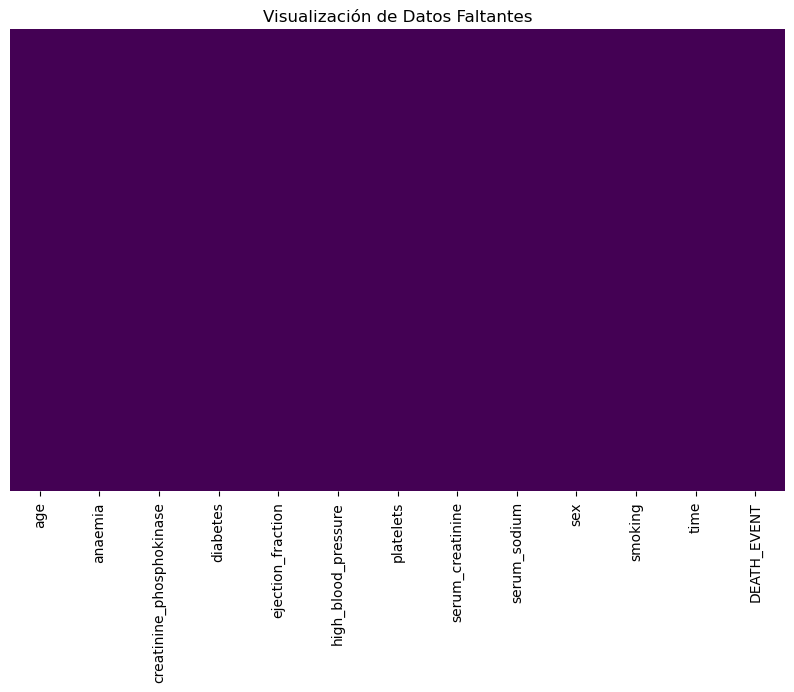

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Visualización de Datos Faltantes')
plt.show()

Análisis del conjunto de datos

1. Ausencia, errores y baja calidad:

    Ausencia de datos: No se detecta la ausencia de datos en el conjunto.
    Errores en los datos: No se detectan datos erróneos durante la revisión.
    Baja calidad de los datos: No se observa la presencia de datos de baja calidad.

2. Ilegibilidad y dificultades de codificación:

    Ilegibilidad: No se identifican registros con datos ilegibles.
    Dificultades de codificación: No se encuentran dificultades de codificación durante la revisión.

3. Posibles problemas:

    Valores atípicos: Se identifican valores atípicos en el conjunto de datos. Conservamos estos valores ya que, en el sector médico, pueden proporcionar información fundamental sobre la patología.
    Valores duplicados: No se detectan valores duplicados durante la revisión.
    Datos faltantes: No se detectan datos faltantes en el conjunto de datos.


En general, el conjunto de datos se encuentra en buen estado. No se detectan ausencias de datos, errores o datos de baja calidad. Tampoco se encuentran registros ilegibles o con dificultades de codificación. Sin embargo, se observa una diversidad de formatos que podría dificultar su consistencia y comprensión. Se recomienda unificar los formatos y documentar el conjunto de datos para facilitar su análisis.

Nota: Es importante tener en cuenta que, al ser del sector médico, los valores atípicos se conservan ya que pueden proporcionar información fundamental sobre la patología.

### **2.4. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.

- El conjunto de datos tiene cómo variable objetivo el evento de muerte, es una variable categórica que denota si el paciente falleció o no.

In [ ]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Vemos que hay una distribución desbalanceada de etiquetas, donde los pacientes fallecidos son 96 , mientras los sobrevivientes son 203, lo que hace que el dataset no esté balanceado en tanto sus etiquetas, observemos la distribución de los datos y su correlación con esta variable para finalizar

/home/robert/anaconda3/envs/Datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/robert/anaconda3/envs/Datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/robert/anaconda3/envs/Datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/robert/anaconda3/envs/Datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

Text(0.5, 0.98, 'Marginal plot and distributions')

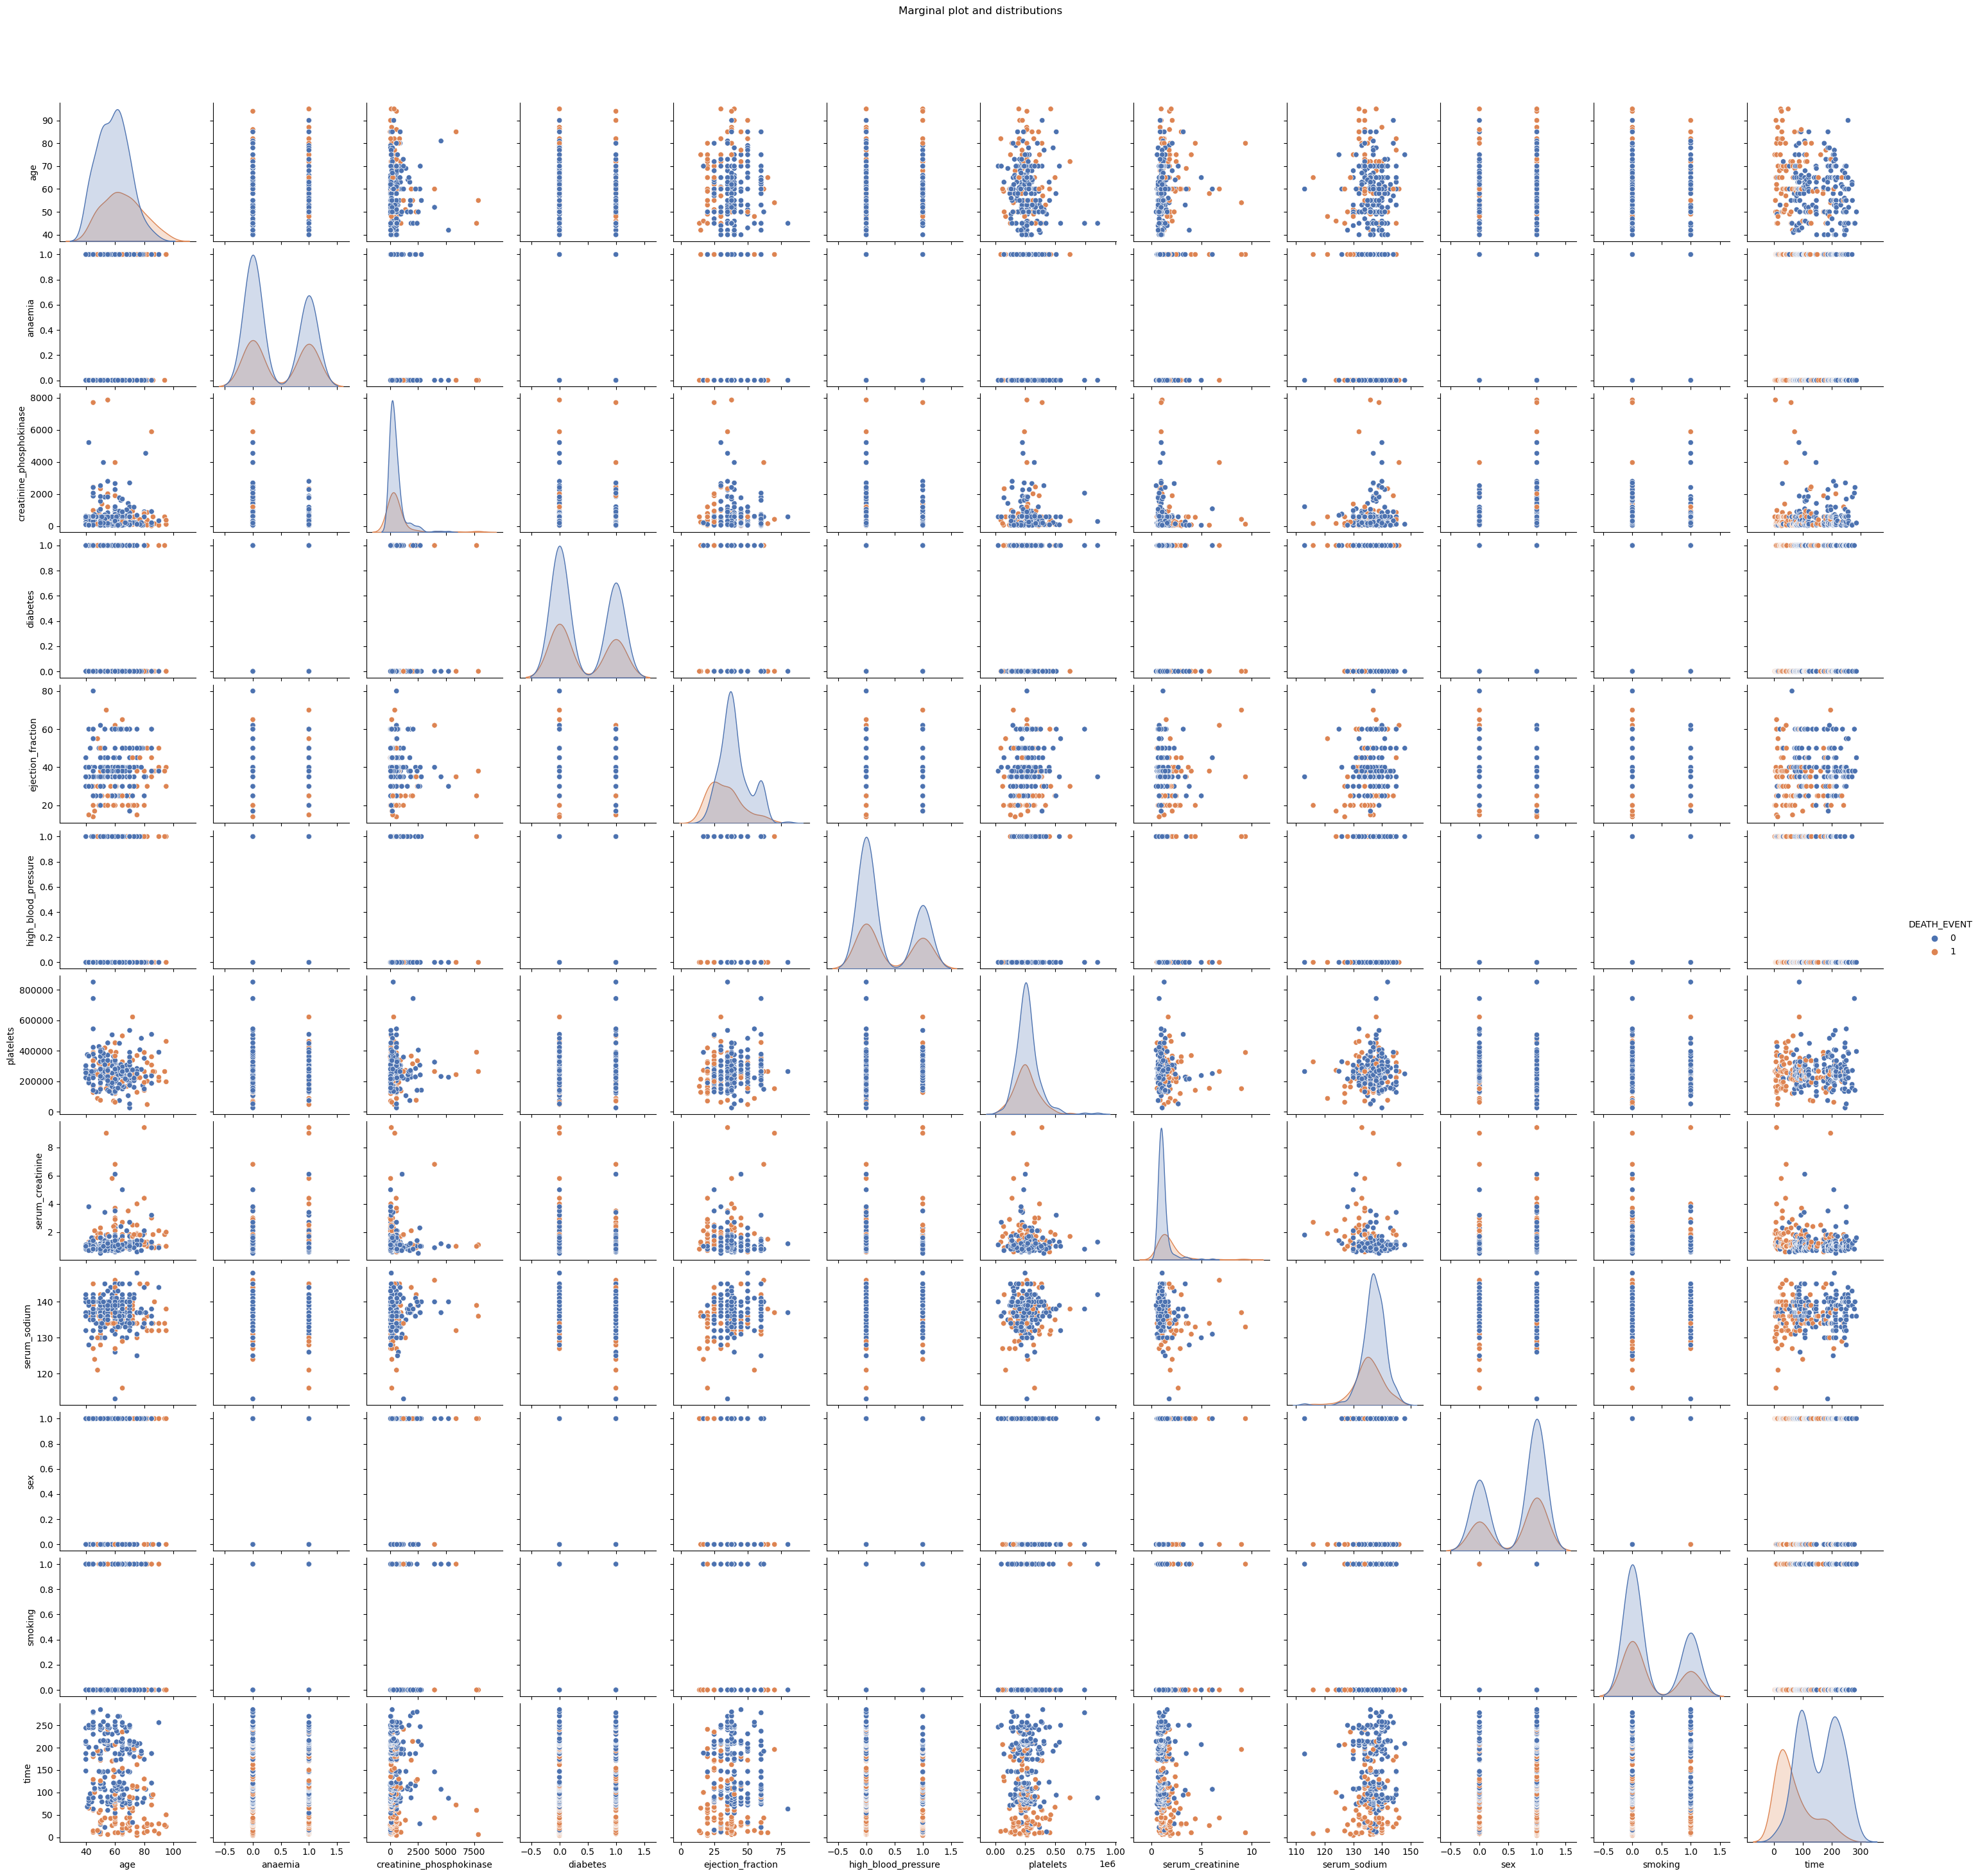

In [ ]:
pair=sns.pairplot(df, hue="DEATH_EVENT",palette='deep')
pair.fig.subplots_adjust(top=.93)
pair.fig.suptitle('Marginal plot and distributions')


Podemos visualizar que las distribuciones en general no cumplen con condiciones de normalidad y que las correlaciones no parecen estar tan claras, aunque según nuestra matriz de correlación cosas cómo la edad o la creatinina guardan una alta correlación con el evento de morir.

---**INGRESE SU RESPUESTA**---

## **Créditos**
* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*